# baccoemu for Lagrangian bias expansion model
Download the latest version of baccoemu from:
```
git clone git@bitbucket.org:rangulo/baccoemu.git
```
Then install it
```
cd baccoemu
pip install .
```
Now you can check it is correctly installed
```
python -c "import baccoemu"
```
Note that if you stay in the ```baccoemu_beta``` folder you will probably get a missing ```_version.py``` error; you can either create that file or just use baccoemu in any other folder without incurring in this problem.

In [1]:
import baccoemu
import numpy as np
import matplotlib.pyplot as plt

2022-07-21 10:33:51.945882: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-21 10:33:51.945898: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-21 10:33:52.909639: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-21 10:33:52.909661: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-21 10:33:52.909678: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pc-486): /proc/driver/nvidia/version does not exist


In [2]:
pars = {
    'omega_cold' : 0.32,
    'omega_baryon' : 0.05,
    'hubble' : 0.67,
    'ns' : 0.96,
    'sigma8_cold' : 0.83,
    'neutrino_mass' : 0.0,
    'w0' : -1,
    'wa' : 0,
    'expfactor' : 1
}

## Use linear and smeared BAO emulators

In [3]:
matter = baccoemu.Matter_powerspectrum()

2022-07-21 10:33:53.032583: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/home/matteozennaro/miniconda3/envs/condaenv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/matteozennaro/miniconda3/envs/condaenv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Linear emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/home/matteozennaro/miniconda3/envs/condaenv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/matteozennaro/miniconda3/envs/condaenv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.22.1 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/matteozennaro/miniconda3/envs/condaenv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using versi

In [4]:
%%time
k_bao, pk_bao = matter.get_smeared_bao_pk(k=None, **pars)

CPU times: user 4.24 ms, sys: 30 µs, total: 4.27 ms
Wall time: 5.4 ms


In [5]:
%%time
k_lin, pk_lin = matter.get_linear_pk(k=k_bao, **pars)

NameError: name 'k_lin' is not defined

## Use nonlinear pk emulator

In [6]:
%%time
k_nl, pk_nl = matter.get_nonlinear_pk(k=None, **pars)

CPU times: user 10.2 ms, sys: 0 ns, total: 10.2 ms
Wall time: 8.65 ms


NameError: name 'k_lin' is not defined

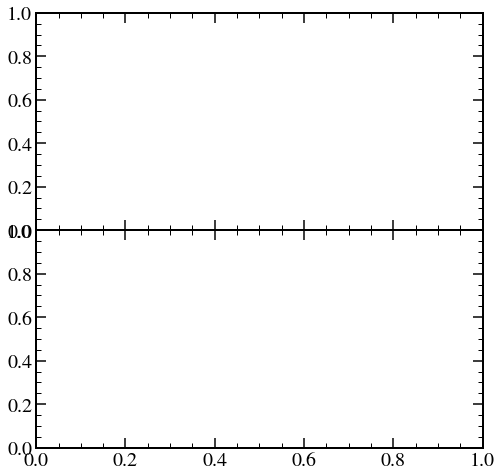

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8), sharex=True, gridspec_kw={'hspace' : 0})

ax[0].loglog(k_lin, pk_lin, lw=3, alpha=0.5, label='linear')
ax[0].loglog(k_bao, pk_bao, lw=3, ls='--', alpha=0.5, label='smeared BAO')
ax[0].loglog(k_nl, pk_nl, lw=3, alpha=0.5, label='nonlinear')
ax[0].legend()

ax[1].semilogx(k_lin, pk_lin / pk_lin, lw=3, alpha=0.5)
ax[1].semilogx(k_lin, pk_bao / pk_lin, lw=3, alpha=0.5)
ax[1].semilogx(k_nl, pk_nl / matter.get_linear_pk(k=k_nl, **pars)[1], lw=3, alpha=0.5)
ax[1].set_ylim(0.95, 1.05)

ax[0].set_ylabel(r'$P(k) \,\, [h^{-3} \,\, \mathrm{Mpc}^{3}]$', fontsize=20)
ax[1].set_ylabel(r'$P(k) / P_{\rm lin}(k)$', fontsize=20)
ax[1].set_xlabel(r'$k \,\, [h \,\, \mathrm{Mpc}^{-1}]$', fontsize=20)

plt.show()

## Use Lagrangian bias terms emulator

In [ ]:
lbias = baccoemu.Lbias_expansion()

In [ ]:
%%time
k, pnn = lbias.get_nonlinear_pnn(k=None, **pars)

In [ ]:
%%time
k, plpt = lbias.get_lpt_pk(k=k, **pars)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 8), sharey=True, gridspec_kw={'wspace' : 0})

labels = lbias.lb_term_labels

for i in range(len(pnn)):
    axi = np.int(i / 5)
    ax[axi].loglog(k, abs(pnn[i]), lw=3, alpha=0.5, color=f'C{i}', label=labels[i])
    ax[axi].loglog(k, abs(plpt[i]), lw=3, ls='--', alpha=0.5, color=f'C{i}')
ax[0].set_xlabel(r'$k \,\, [h \,\, \mathrm{Mpc}^{-1}]$', fontsize=20)
ax[1].set_xlabel(r'$k \,\, [h \,\, \mathrm{Mpc}^{-1}]$', fontsize=20)
ax[2].set_xlabel(r'$k \,\, [h \,\, \mathrm{Mpc}^{-1}]$', fontsize=20)
ax[0].set_ylabel(r'$|P_{ij}| \,\, [h^{-3} \,\, \mathrm{Mpc}^3]$', fontsize=20)
_l = [plt.Line2D([], [], lw=3, ls='-', color='k', label='LPT'), plt.Line2D([], [], lw=3, ls='--', color='k', label='nonlinear')]
_l = ax[0].legend(handles=_l, loc='lower right')
ax[0].add_artist(_l)
for _ax in ax:
    _ax.legend()
plt.show()

In [ ]:
bias = [0.75, 0.25, 0.1, 1.4] # b1, b2, bs2, blaplacian

In [ ]:
%%time
kgal, pgalauto, pgalcross = lbias.get_galaxy_real_pk(bias=bias, k=None, **pars)

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5), sharey=True, gridspec_kw={'wspace' : 0})

bb = [np.linspace(0.3, 1.7, 5), np.linspace(-0.6, 0.6, 5), np.linspace(-0.6, 0.6, 5), np.linspace(-20, 1, 5)]
labels = [r'$b_{1}$', r'$b_{2}$', r'$b_{s^2}$', r'$b_{\nabla^2\delta}$']

for i, bbi in enumerate(bb):
    for bi in bbi: 
        this_bias = np.copy(bias)
        this_bias[i] = bi
        res = lbias.get_galaxy_real_pk(bias=this_bias, k=None, **pars)
        ax[i].loglog(kgal, res[1], lw=3, alpha=0.5)
        ax[i].set_xlabel(r'$k \,\, [h \,\, \mathrm{Mpc}^{-1}]$', fontsize=20)
        ax[i].set_title(labels[i], fontsize=20)
ax[0].set_ylabel(r'$P(k) \,\, [h^{-3} \,\, \mathrm{Mpc}^3]$', fontsize=20)
plt.show()